### Decision Trees

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
import pandas as pa
prets = pa.read_csv('prets.csv', delimiter=';')
prets

,Age,Salaire,Proprietaire,Contrat,Pret accorde
0,<30,eleve,non,CDD,non
1,<30,eleve,non,CDI,non
2,30 .. 40,eleve,non,CDD,oui
3,>40,moyen,non,CDD,oui
4,>40,faible,oui,CDD,oui
5,>40,faible,oui,CDI,non
6,30 .. 40,faible,oui,CDI,oui
7,<30,moyen,non,CDD,non
8,<30,faible,oui,CDD,oui
9,>40,moyen,oui,CDD,oui


In [13]:
columns = ['Age', 'Salaire', 'Proprietaire', 'Contrat', 'Pret accorde']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for c in columns:
    le.fit(prets[c])
    prets[c] = le.transform(prets[c])
prets

,Age,Salaire,Proprietaire,Contrat,Pret accorde
0,1,0,0,0,0
1,1,0,0,1,0
2,0,0,0,0,1
3,2,2,0,0,1
4,2,1,1,0,1
5,2,1,1,1,0
6,0,1,1,1,1
7,1,2,0,0,0
8,1,1,1,0,1
9,2,2,1,0,1


In [14]:
features_cols =['Age', 'Salaire', 'Proprietaire', 'Contrat']
class_col = ['Pret accorde']
X = prets[features_cols]
y = prets[class_col]

In [15]:
from sklearn import tree
cls1= tree.DecisionTreeClassifier(criterion='entropy')
cls1.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

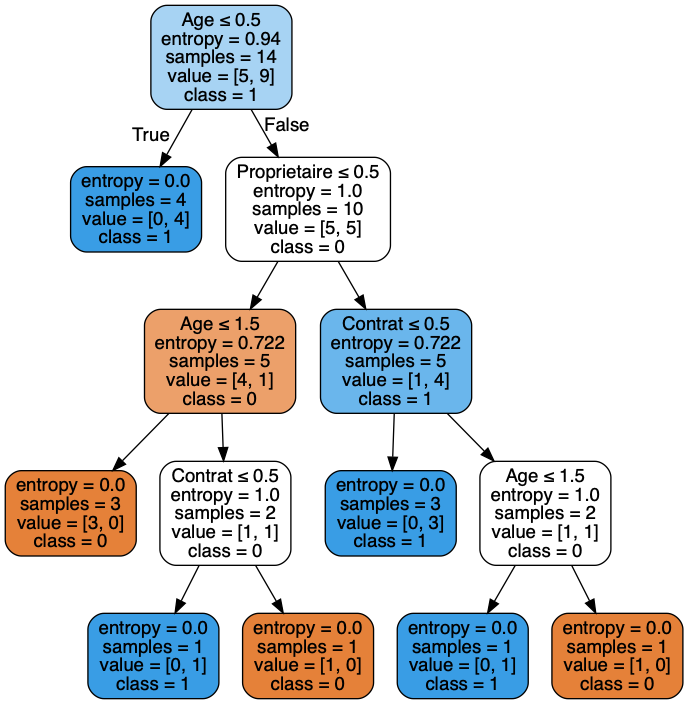

In [16]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(cls1, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = features_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('prets.png')
Image(graph.create_png())

In [17]:
from sklearn import tree
cls = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
cls.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

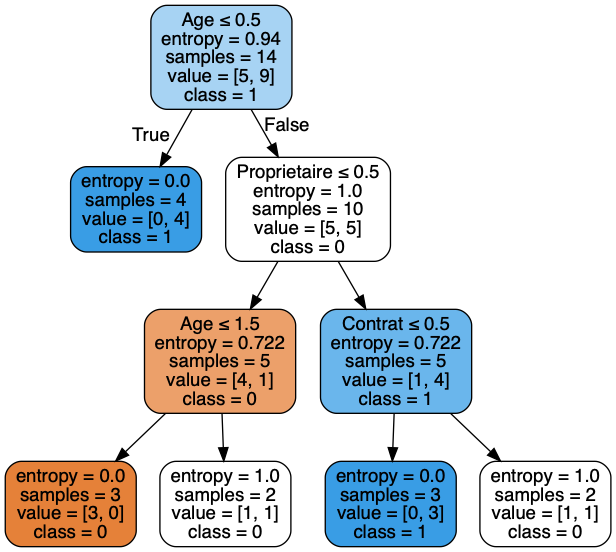

In [18]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(cls, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('prets.png')
Image(graph.create_png())

In [19]:
X = [[1, 0, 0, 0]]
y = cls.predict(X)
print(y)

[0]


#### Un exemple plus conséquent : 

In [20]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pa.read_csv('https://www.labri.fr/~zemmari/datasets/pima-indians-diabetes.csv',
                   header=None, names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols]
y = pima.label

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=109)

In [23]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [26]:
from sklearn import metrics
y_pred = dt.predict(X_test)
scores = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ','{:2.2%}'.format(scores))

Accuracy:  70.13%


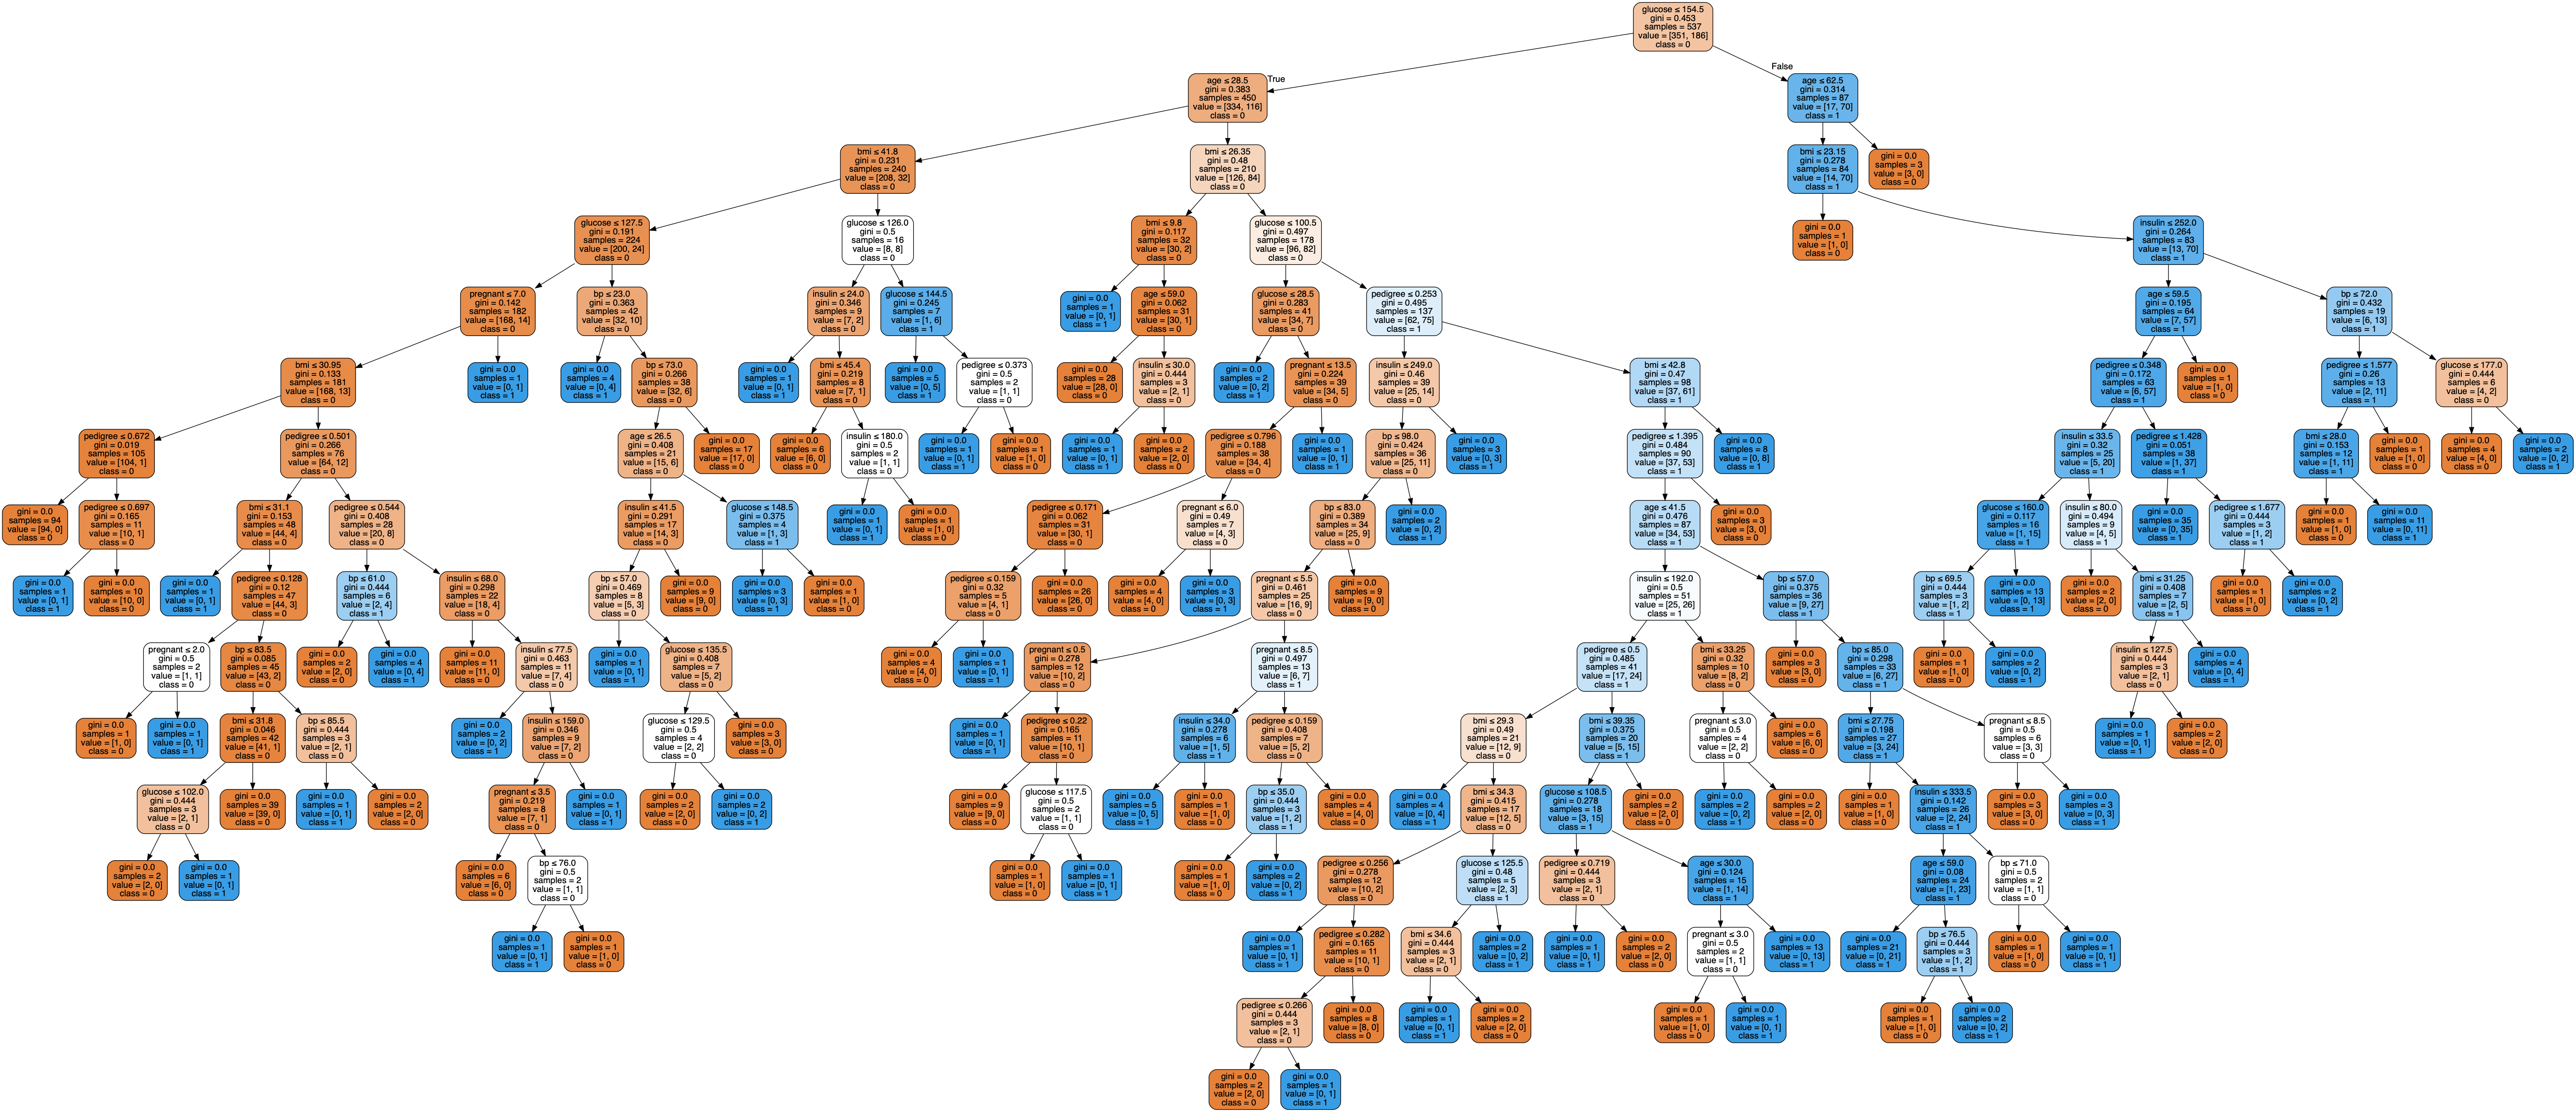

In [27]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

## Random Forests

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
scores = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ','{:2.2%}'.format(scores))

Accuracy:  76.19%


In [29]:
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [32]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [33]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [34]:
best_rf = RandomForestClassifier(bootstrap=True,
                                 max_depth=80,
                                 max_features='auto',
                                 min_samples_leaf=4,
                                 min_samples_split=5,
                                 n_estimators=1000)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)
scores = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ','{:2.2%}'.format(scores))

Accuracy:  78.35%
